# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 10 - ANÁLISIS DE VULNERABILIDAD DE REDES

In [5]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
import itertools as it
from scipy import stats

### 1 Robustez a errores aleatorios

#### 1.1 Replicar un número de veces (e.g. 10) el siguiente experimento:

In [6]:
def aleatorio(inicio, valor):
    x = np.random.randint(0, inicio)
    while x == valor:
        x = np.random.randint(0, inicio)
    return x

def preferentialAttachment(N, inicio, enlaces):
    G = nx.Graph()
    G.add_edges_from(it.combinations(range(inicio),2))
    nodo_actual = G.number_of_nodes()
    lista = []
    lista_aux = []
            
    #Obtenemos el grado de todos los nodos
    for node in G.nodes:
        for grado in range(G.degree(node)):
            lista.append(node)
    
    #Añadimos el nuevo nodo con sus enlaces
    for i in range(N-inicio):
                
        #G.add_node(nodo_actual) #Añadimos el nodo al grafo
        
        #Añadimos los enlaces para ese nodo
        for enlace in range(enlaces):
            nodo_a_enlazar = random.choice(lista)
            while G.has_edge(nodo_a_enlazar, nodo_actual):
                nodo_a_enlazar = random.choice(lista)
            G.add_edge(nodo_a_enlazar, nodo_actual)
            lista_aux.append(nodo_a_enlazar)
            lista_aux.append(nodo_actual)
            
        lista += lista_aux
        lista_aux = []
            
        nodo_actual += 1
        
    return G

In [22]:
# Realizamos montecarlo

def montecarlo(intentos, G):
    matriz = []
    nodos_aleatorios = np.random.permutation(G.nodes)
    
    for i in range(intentos):
        componente_gigante = []
        
        for nodo in nodos_aleatorios:
            enlaces_a_eliminar = []
            
            #Guardamos los enlaces a eliminar si hay enlaces para ese nodo
            for enlace in G.edges:
                if nodo in enlace:
                    enlaces_a_eliminar.append(enlace)
            
            #Eliminamos el enlace
            G.remove_edges_from(enlaces_a_eliminar)
                
            #Componente gigante
            tamanio_componentes = [len(c) for c in nx.connected_components(G)]
            componente_gigante.append(max(tamanio_componentes))
        matriz.append(componente_gigante)
    return matriz

# Realizamos la conectividad
def conectividad(matriz):
    conect = np.zeros(len(matriz[0]))
    for fila in matriz:
        cont = 0
        for columna in fila:
            conect[cont] += columna
            cont += 1
    for i in range(len(conect)):
        conect[i] = conect[i]/len(matriz)
    return conect

In [23]:
G = preferentialAttachment(1000,3,3)
montecarlos = montecarlo(10,G)
conectividades =conectividad(montecarlos)

#### 1.2 Representar gráficamente la evolución temporal de los valores medios de conectividad

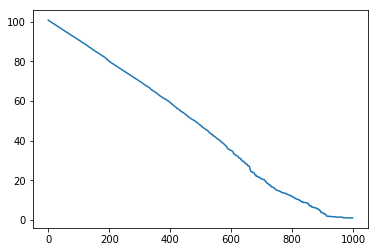

In [24]:
plt.plot(range(len(G.nodes())),conectividades)

### 2 Robustez a ataques dirigidos

#### 2.1 Replicar un número de veces (e.g. 10)

In [29]:
def grados_nodos(G):
    gradosNodos = []
    
    for nodo in G.nodes():
        gradosNodos.append([nodo, G.degree(nodo)])
    return gradosNodos

def montecarloVersion2(intentos, G):
    matriz = []
    
    for i in range(intentos):
        componente_gigante = []
            
        for nodo in G.nodes:
            gradosNodos = grados_nodos(G)
            maximo=0
            
            #Obtenemos el nodo de mayor grado
            for grado in gradosNodos:
                if grado[1] > maximo:
                    maximo=grado[1]
                    nodo=grado[0]
                    
            enlaces_a_eliminar = []
            
            #Guardamos los enlaces a eliminar si hay enlaces para ese nodo
            for enlace in G.edges:
                if nodo in enlace:
                    enlaces_a_eliminar.append(enlace)
            
            #Eliminamos el enlace
            G.remove_edges_from(enlaces_a_eliminar)
                
            #Componente gigante
            tamanio_componentes = [len(c) for c in nx.connected_components(G)]
            componente_gigante.append(max(tamanio_componentes))
        matriz.append(componente_gigante)
    return matriz

In [30]:
G = preferentialAttachment(1000,3,3)
montecarlos = montecarloVersion2(10,G)
conectividades = conectividad(montecarlos)

#### 2.2 Representar gráficamente la evolución temporal de los valores medios de conectividad

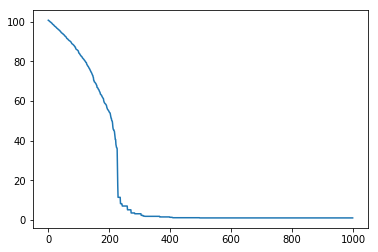

In [31]:
plt.plot(range(len(G.nodes())),conectividades)

### 3 Comentar resultados

#### 3.1 Indique ante qué tipo de fallos (errores aleatorios, ataques dirigidos) la red de Barabási-Albert se comporta mejor. Explique brevemente alguna razón del porqué de la diferencia de comportamiento.

Barabasi se comporta antes ataques aleatorios, ya que eliminamos nodos aleatorios, es por ello que un nodo si no tiene muchos enlaces no afecta demasiado.

En el caso de que sea dirigido si se consigue alcanzar al hub cae muy rápido la red


### 4 Robustez de una red aleatoria de Erdös-Rényi

#### 4.1 Repetir el análisis de los puntos 1 y 2 anteriores para una red aleatoria de Edös-Rényi equivalente (es decir que tenga el mismo número de nodos, N=1000, y un grado medio similar, <k>=2m=6)


In [34]:
# Realizamos montecarlo

def montecarloVersion3(intentos):
    G = nx.erdos_renyi_graph(1000, (2*3)/1000)
    matriz = []
    nodos_aleatorios = np.random.permutation(G.nodes)
    for i in range(intentos):
        componente_gigante = []
        
        for nodo in nodos_aleatorios:
            enlaces_a_eliminar = []
            
            #Guardamos los enlaces a eliminar si hay enlaces para ese nodo
            for enlace in G.edges:
                if nodo in enlace:
                    enlaces_a_eliminar.append(enlace)
            
            #Eliminamos el enlace
            G.remove_edges_from(enlaces_a_eliminar)
                
            #Componente gigante
            tamanio_componentes = [len(c) for c in nx.connected_components(G)]
            componente_gigante.append(max(tamanio_componentes))
        matriz.append(componente_gigante)
    return matriz

In [35]:
montecarlos = montecarloVersion3(10)
conectividades =conectividad(montecarlos)

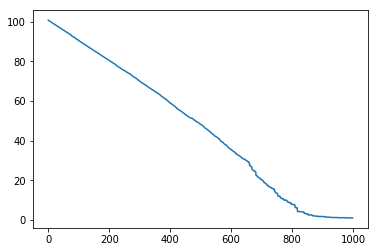

In [36]:
plt.plot(range(len(G.nodes())),conectividades)

In [39]:
def montecarloVersion4(intentos):
    G = nx.erdos_renyi_graph(1000, (2*3)/1000)
    matriz = []
    
    for i in range(intentos):
        componente_gigante = []
            
        for nodo in G.nodes:
            gradosNodos = grados_nodos(G)
            maximo=0
            
            #Obtenemos el nodo de mayor grado
            for grado in gradosNodos:
                if grado[1] > maximo:
                    maximo=grado[1]
                    nodo=grado[0]
                    
            enlaces_a_eliminar = []
            
            #Guardamos los enlaces a eliminar si hay enlaces para ese nodo
            for enlace in G.edges:
                if nodo in enlace:
                    enlaces_a_eliminar.append(enlace)
            
            #Eliminamos el enlace
            G.remove_edges_from(enlaces_a_eliminar)
                
            #Componente gigante
            tamanio_componentes = [len(c) for c in nx.connected_components(G)]
            componente_gigante.append(max(tamanio_componentes))
        matriz.append(componente_gigante)
    return matriz

In [40]:
montecarlos = montecarloVersion4(10)
conectividades =conectividad(montecarlos)

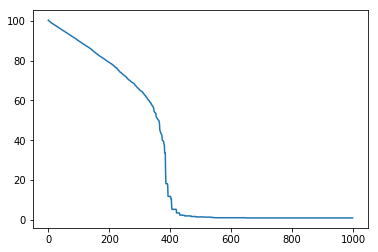

In [41]:
plt.plot(range(len(G.nodes())),conectividades)

#### 4.2 Indique ante qué tipo de fallos (errores aleatorios, ataques dirigidos) la red de Erdös-Rényi se comporta mejor; ¿considera que existe alguna diferencia (razone la respuesta)?.

La red Erdos se comporta antes ataques aleatorios, ya que eliminamos nodos aleatorios, es por ello que un nodo si no tiene muchos enlaces no afecta demasiado.

En el caso de que sea dirigido si se consigue alcanzar al hub cae muy rápido la red

Sí que hay una diferencia, ya que si seleccionamos al nodo de mayor grado es más efectivo el ataque dirigido, ya que eliminamos un nodo "importante" en la red de una forma muy rápida.